In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
from nltk import word_tokenize

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define mutinomial naive Bayes classifier as mnb
mnb = MultinomialNB()

In [3]:
df=pd.read_excel("data_sdgs and non_final.xlsx")

C:\Users\daian\anaconda3\lib\site-packages\openpyxl\compat\numbers.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.float,


In [4]:
df.head(2)

,Company Name,Long_description,Type
0,Affect Therapeutics,Affect is using digital technology to deliver ...,SDGs
1,Level,Level makes it easy for people to pay with the...,SDGs


In [5]:
category=df["Type"].index

In [6]:
df["Type"].index

RangeIndex(start=0, stop=2137, step=1)

In [7]:
df.shape

(2137, 3)

In [8]:
df["Type"].value_counts()

SDGs        1199
non_SDGs     938
Name: Type, dtype: int64

In [9]:
df["Type"].value_counts(normalize=True)

SDGs        0.561067
non_SDGs    0.438933
Name: Type, dtype: float64

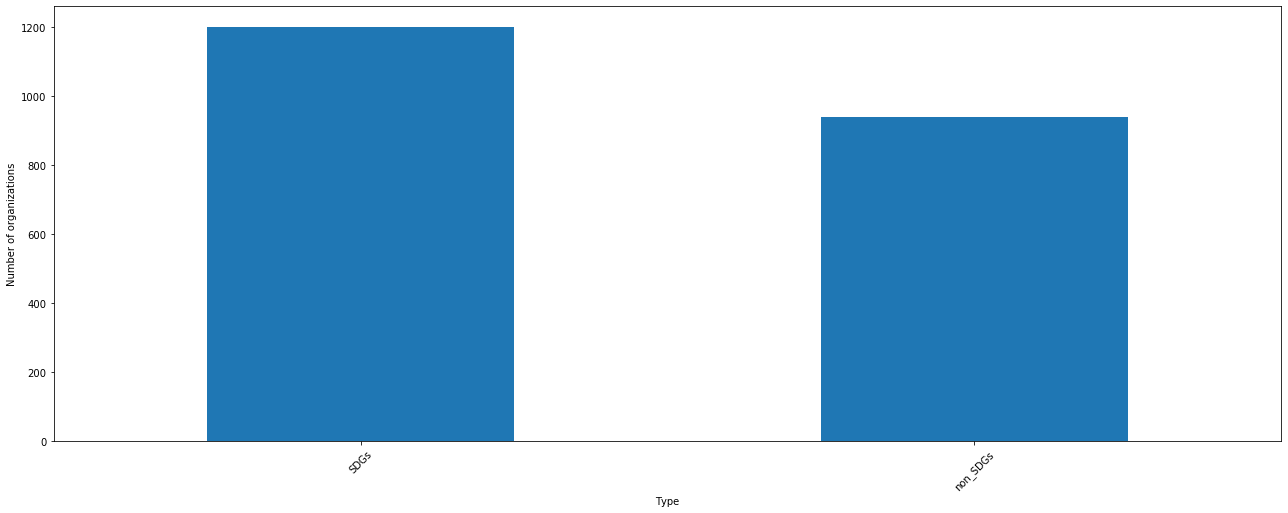

In [10]:
df["Company Name"].groupby(df["Type"]).count().plot(kind="bar",figsize=(22, 8),
                                           rot=45)
plt.xlabel("Type")
plt.ylabel("Number of organizations")
plt.show()


In [11]:
y=df["Type"].values
y

array(['SDGs', 'SDGs', 'SDGs', ..., 'non_SDGs', 'non_SDGs', 'non_SDGs'],
      dtype=object)

In [12]:
type(y)

numpy.ndarray

In [13]:
X=df["Long_description"]

In [14]:
#X=X.to_frame()

In [15]:
X

0       Affect is using digital technology to deliver ...
1       Level makes it easy for people to pay with the...
2       Bitwise Industries creates a bridge between hu...
3       Everytable is a Los Angeles-based social enter...
4       Frontier Markets is the market leader in conne...
                              ...                        
2132    Mux is building the future of online video inf...
2133    Kajabi is a knowledge commerce platform which ...
2134    Rokt is the global leader in ecommerce technol...
2135    Maven is a media coalition of professional con...
2136    Bigtincan (ASX:BTH) helps sales and service te...
Name: Long_description, Length: 2137, dtype: object

In [16]:
type(X)

pandas.core.series.Series

In [17]:
Y=df["Type"]

In [18]:
Y

0           SDGs
1           SDGs
2           SDGs
3           SDGs
4           SDGs
          ...   
2132    non_SDGs
2133    non_SDGs
2134    non_SDGs
2135    non_SDGs
2136    non_SDGs
Name: Type, Length: 2137, dtype: object

In [19]:
#Y=Y.to_frame()

In [20]:
# Import train_test_split function
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0) # 70% training and 30% test

In [21]:
y_train.shape

(1495,)

In [22]:
X_train.shape

(1495,)

In [23]:
import numpy as np
targets=list(np.unique(y))
np.unique(y)

array(['SDGs', 'non_SDGs'], dtype=object)

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

C:\Users\daian\anaconda3\lib\site-packages\seaborn\utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


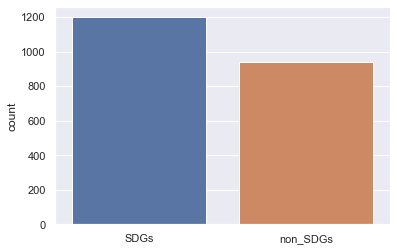

In [25]:
sns.countplot(y)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vectors=vectorizer.fit_transform(X_train)
vectors_test=vectorizer.fit_transform(y_train)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [28]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB()) # Apply two (or more generally, several)
#models in a pipeline
#In this case the data is first vectorized and then used on multinomial naive Bayes

In [29]:
model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [30]:
#Fit model
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [31]:
#predicted labels
predictedlabels = model.predict(X_test)

<>:9: DeprecationWarning: invalid escape sequence \h
<>:9: DeprecationWarning: invalid escape sequence \h
<>:9: DeprecationWarning: invalid escape sequence \h
<ipython-input-32-dce09a6598b3>:9: DeprecationWarning: invalid escape sequence \h
  plt.savefig('graphs\heatmap_'+'.png',bbox_inches="tight")
C:\Users\daian\anaconda3\lib\site-packages\seaborn\matrix.py:69: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
C:\Users\daian\anaconda3\lib\site-packages\seaborn\matrix.py:79: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavio

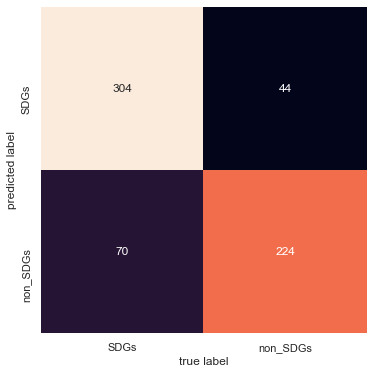

In [32]:
mat = confusion_matrix(y_test, predictedlabels)
fig= plt.figure(figsize=(6,6))
#plot heatmap (generalized confusion matrix, i.e. confusion matrix for multiclass classification)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)

plt.xlabel('true label')
plt.ylabel('predicted label');
plt.savefig('graphs\heatmap_'+'.png',bbox_inches="tight")

In [33]:
# SOLUTION

#compute the predicted values by using the model gnb on the test set X_test
#y_pred = gnb.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': predictedlabels})

dg = df[df['Actual']!=df['Predicted']]

print('\nThe percentage of correctly classified points is given by: ', 100*(len(y_test)-len(dg))/len(y_test), '%')


The percentage of correctly classified points is given by:  82.24299065420561 %


In [34]:
dg

,Actual,Predicted
810,SDGs,non_SDGs
1638,non_SDGs,SDGs
686,SDGs,non_SDGs
935,SDGs,non_SDGs
684,SDGs,non_SDGs
...,...,...
1732,non_SDGs,SDGs
271,SDGs,non_SDGs
1797,non_SDGs,SDGs
1679,non_SDGs,SDGs


In [35]:
#Let's compute the accuracy of the Gaussian naive Bayes classifier 
#y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score
predictedlabels = model.predict(X_test)
print("The accuracy of the Multivariate naive Bayes classifier is: ", accuracy_score(y_test,predictedlabels))

The accuracy of the Multivariate naive Bayes classifier is:  0.822429906542056


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("\n \n Classification report \n\n", metrics.classification_report(y_test, predictedlabels))
cm = confusion_matrix(y_test, predictedlabels)

print("\n \n The confusion matrix is given by: \n \n", cm)


 
 Classification report 

               precision    recall  f1-score   support

        SDGs       0.87      0.81      0.84       374
    non_SDGs       0.76      0.84      0.80       268

    accuracy                           0.82       642
   macro avg       0.82      0.82      0.82       642
weighted avg       0.83      0.82      0.82       642


 
 The confusion matrix is given by: 
 
 [[304  70]
 [ 44 224]]
